In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [108]:
total_data=pd.read_csv("../data/processed/final_data.csv")
total_data.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,0,0,36,0,0,0,0,0,0,34.0141,-118.2978,0,0,0
1,2020-01-01,330,1,0,25,1,1,1,1,1,1,34.0459,-118.2545,0,0,1
2,2020-01-01,1730,2,1,76,0,2,2,2,1,2,34.1685,-118.4019,0,0,2
3,2020-01-01,415,3,2,31,2,3,3,2,1,3,34.2198,-118.4468,0,0,3
4,2020-01-01,30,1,3,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4


In [109]:
# killers=total_data[total_data['crm_cd_desc'].isin([10, 26, 38, 66, 83, 118])]
killers=total_data[total_data['crm_cd_desc'].isin([66])]

In [110]:
killers=killers[killers['area_name'].isin([1])]

In [111]:
killers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 4515 to 318622
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_occ      101 non-null    object 
 1   time_occ      101 non-null    int64  
 2   area_name     101 non-null    int64  
 3   crm_cd_desc   101 non-null    int64  
 4   vict_age      101 non-null    int64  
 5   vict_sex      101 non-null    int64  
 6   vict_descent  101 non-null    int64  
 7   premis_desc   101 non-null    int64  
 8   weapon_desc   101 non-null    int64  
 9   status_desc   101 non-null    int64  
 10  location      101 non-null    int64  
 11  lat           101 non-null    float64
 12  lon           101 non-null    float64
 13  weekday       101 non-null    int64  
 14  month         101 non-null    int64  
 15  mocodes_desc  101 non-null    int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 13.4+ KB


In [112]:
killers.reset_index(inplace=True)

In [113]:
killers = killers[["vict_age", "vict_sex", "vict_descent"]]
killers.head()

,vict_age,vict_sex,vict_descent
0,20,1,0
1,61,1,2
2,45,1,0
3,72,1,0
4,53,1,0


In [114]:
killers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   vict_age      101 non-null    int64
 1   vict_sex      101 non-null    int64
 2   vict_descent  101 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [115]:
#killers=killers.drop('crm_cd_desc',axis=1)

In [116]:
killers.to_csv("../data/processed/killers_data.csv",index=False)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

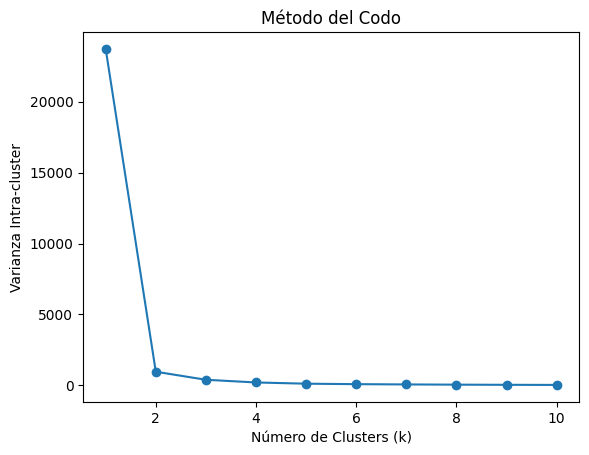

In [117]:

# Lista para almacenar la varianza intra-cluster para diferentes valores de k
inertia_values = []

# Prueba diferentes valores de k
for k in range(1, 50, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(killers)
    inertia_values.append(kmeans.inertia_)

# Dibuja el gráfico del método del codo
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Varianza Intra-cluster')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

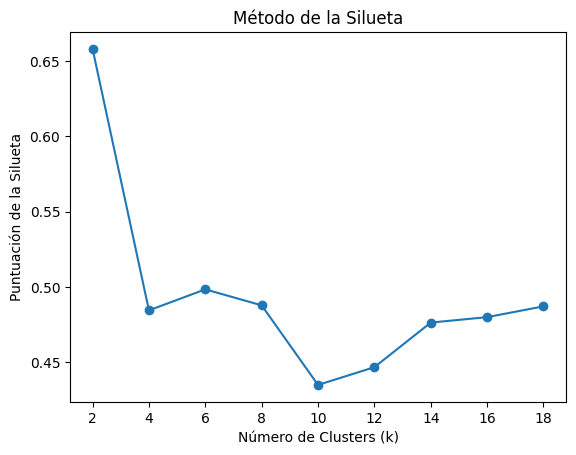

Número óptimo de clusters (k) según el método de la silueta: 2


In [118]:
# Probar diferentes valores de k
k_values = range(2, 20, 2)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(killers)
    
    # Calcular la puntuación de la silueta para el número actual de clusters (k)
    silhouette_avg = silhouette_score(killers, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de la silueta
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación de la Silueta')
plt.show()

# Encontrar el número óptimo de clusters (k) según la puntuación de la silueta
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Número óptimo de clusters (k) según el método de la silueta: {optimal_k}')


In [119]:
# Probar diferentes valores de k
# k_values = range(15, 30, 2)
# silhouette_scores = []

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     cluster_labels = kmeans.fit_predict(killers)
    
#     # Calcular la puntuación de la silueta para el número actual de clusters (k)
#     silhouette_avg = silhouette_score(killers, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# # Graficar la curva de la silueta
# plt.plot(k_values, silhouette_scores, marker='o')
# plt.title('Método de la Silueta')
# plt.xlabel('Número de Clusters (k)')
# plt.ylabel('Puntuación de la Silueta')
# plt.show()

# # Encontrar el número óptimo de clusters (k) según la puntuación de la silueta
# optimal_k = k_values[np.argmax(silhouette_scores)]
# print(f'Número óptimo de clusters (k) según el método de la silueta: {optimal_k}')

In [120]:
# Probar diferentes valores de k
# k_values = range(30, 60, 5)
# silhouette_scores = []

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     cluster_labels = kmeans.fit_predict(killers)
    
#     # Calcular la puntuación de la silueta para el número actual de clusters (k)
#     silhouette_avg = silhouette_score(killers, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# # Graficar la curva de la silueta
# plt.plot(k_values, silhouette_scores, marker='o')
# plt.title('Método de la Silueta')
# plt.xlabel('Número de Clusters (k)')
# plt.ylabel('Puntuación de la Silueta')
# plt.show()

# # Encontrar el número óptimo de clusters (k) según la puntuación de la silueta
# optimal_k = k_values[np.argmax(silhouette_scores)]
# print(f'Número óptimo de clusters (k) según el método de la silueta: {optimal_k}')

In [121]:
optimal_k

2

In [122]:
dict_ = {'killers_best_k': optimal_k}

In [123]:
resultados_json = pd.Series(dict_).to_json(indent=2)

with open('../data/processed/best_k.json', 'w') as file:
    file.write(resultados_json)

In [124]:
X = killers
X_train, X_test = train_test_split(X, test_size=0.3, random_state=14)

In [125]:
X_train.to_csv("../data/processed/killers_X_train.csv", index=False)
X_test.to_csv("../data/processed/killers_X_test.csv", index=False)